# Задача на прогноз цен жилья в Бостоне в 1970 году (Boston House Prices)

Всего признаков - 14. Целевая фича - средняя стоимость домов (MEDV). Даны следующие признаки:

**CRIM** - уровень преступности на душу населения

**ZN** - доля земли под жилую застройку, разделенные на зоны под участки площадью более 25000 кв. футов.

**INDUS** - доля акров, не относящихся к розничной торговле, на город 

**CHAS** - фиктивная переменная реки Чарльз (равен 1, если участок граничет с рекой, 0 в противном случае)

**NOX** - концентрация оксида азота (частей на 10 миллионов) 

**RM** - среднее количество комнат в доме

**AGE** - доля жилых единиц, построенных до 1940 г.

**DIS** - взвешенные расстояния до пяти бостонских центров занятости

**RAD** - индекс доступности радиальных магистралей

**TAX** - полная ставка налога на имущество за 10 000 долларов

**PTRATIO** - соотношение учеников и учителей по городам

**B** - 1000*(Bk − 0,63)^2, где Bk - доля черных по городу

**LSTAT** - процент низкого статуса населения

**MEDV** - средняя стоимость домов владельцев (в 1000 долларов).

## Импортирование библиотек и поверхнойстный анализ данных

In [118]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import lognorm
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import  BaseEstimator,  TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [144]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', delim_whitespace=True, names = columns)

In [4]:
data.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

*Количество объектов в таблице - 506. Количество признаков - 14.*

In [5]:
data.shape

(506, 14)

## Анализ данных

### Проверка на наличие пустых значений признаков и определение типа

*Пустых значений в признаках нет. Из 14 признаков - 12 имеют тип float, 2 - int.*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Вывод общей статистики по всем признакам

*Признаки CHAS и RAD по describe-таблице похожи на категориальные. Остальные 12 признаков на численные.*

In [7]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

*Определим количество уникальных значений для всех признаков. Однозначно, признаки CHAS и RAD стоит отнести к категориальнм данным, так как количество уникальных значений в процентном соотношении от обещго количества объектов составляет менее двух процентов. Признаки ZN, PTRATIO имеют количество уникальных значений менее 10 процентов от общего количество объектов.*

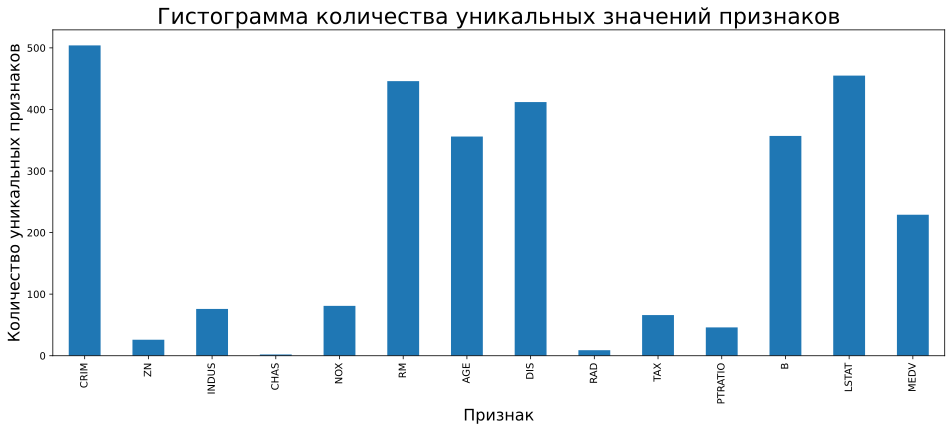

In [8]:
unic_columns = pd.Series([data[i].nunique() for i in data.columns], index = data.columns)
plt.figure(figsize=(16, 6))
unic_columns.plot(kind = 'bar')
plt.title('Гистограмма количества уникальных значений признаков', fontsize=22)
plt.xlabel('Признак', fontsize=16)
plt.ylabel('Количество уникальных признаков', fontsize=16)
plt.show()

In [9]:
round(unic_columns * 100 / len(data), 2)

CRIM       99.60
ZN          5.14
INDUS      15.02
CHAS        0.40
NOX        16.01
RM         88.14
AGE        70.36
DIS        81.42
RAD         1.78
TAX        13.04
PTRATIO     9.09
B          70.55
LSTAT      89.92
MEDV       45.26
dtype: float64

*Посмотрим на распределение целевой переменной.*

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

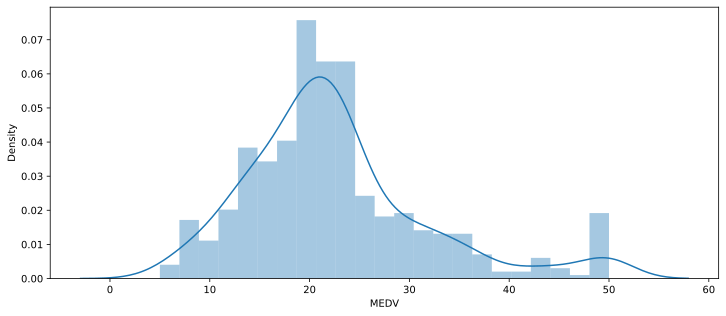

In [10]:
plt.figure(figsize = (12, 5))
sns.distplot(data['MEDV'])

**В нижней и верхней части распределения целевого признака можно наблюдать отклонение от идеального нормального распределения (плотность вероятности целевой переменной в нижней и верхней части больше). Но в общем, распределоение близко к нормальному. Имеются выбросы.**

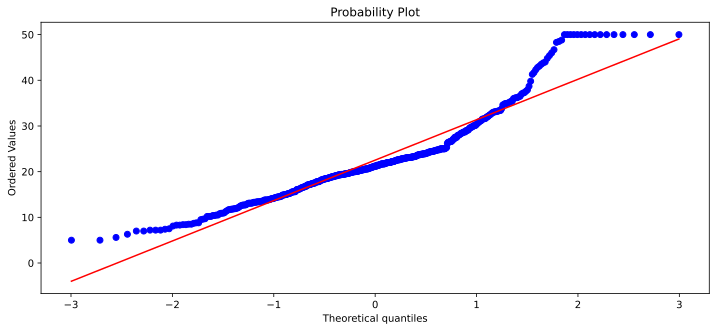

In [11]:
plt.figure(figsize = (12, 5))
stats.probplot(data['MEDV'], dist="norm", plot=pylab)
plt.show()

**Для правильной оценки зависимости признаков от целевой переменной стоит избавиться от выбросов в целевой переменной в самом начале**

In [145]:
Q1 =  data['MEDV'].quantile(0.25)
Q3 = data['MEDV'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['MEDV'] > Q1-1.5*IQR ) & (data['MEDV'] < Q3+1.5*IQR)]
data.shape

(466, 14)

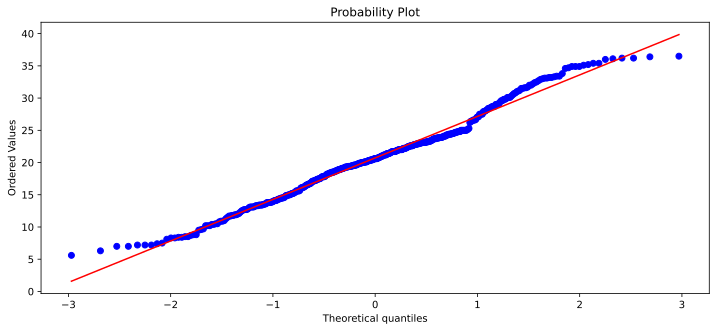

In [100]:
plt.figure(figsize = (12, 5))
stats.probplot(data['MEDV'], dist="norm", plot=pylab)
plt.show()

### Связь между признаками. Корреляционная таблица.

*Выведем корреляционную матрицу по всем признакам нашей задачи. Почти все признаки хорошо коррелируют между собой. Это говорит о мультиколлиниарности. Выделим пары признаков, имеющих наиболее значительную корреляционную связь между собой.*
*Сильную обратную корреляцию имеют пары признаков - (MEDV, LSTAT), (DIS, AGE), (DIS, NOX), (DIS, INDUS). Сильную положительную корреляцию имееют следующие пары признаков: (MEDV, RM), (TAX, NOX), (NOX, INDUS), (DIS, ZN), (INDUS, TAX), (AGE, NOX), ('RAD', 'TAX')*

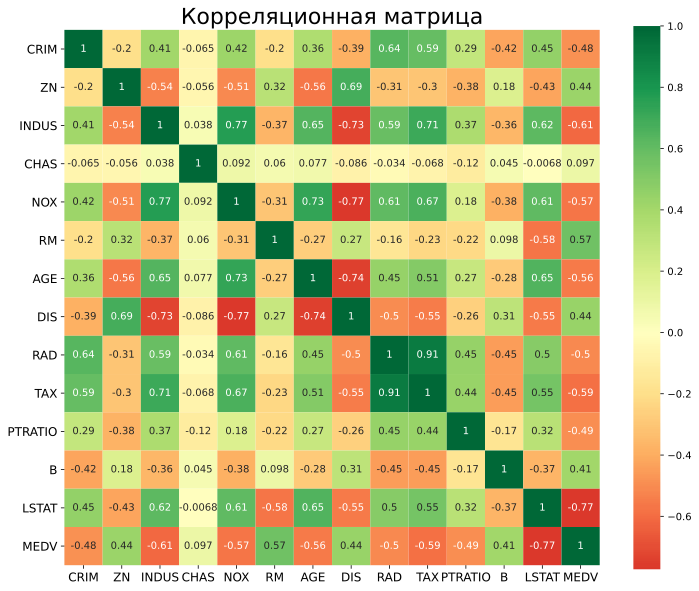

In [101]:
plt.figure(figsize = (12, 10), dpi= 80)
sns.heatmap(data=data.corr(),  annot=True, cmap='RdYlGn', center = 0, square=True)
plt.title('Корреляционная матрица', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*Для удобства выделим пары признаков, имеющие очень сильную корреляционную связь.*

In [102]:
couple_feature_corr = {} # словарь с ключом - пара признаков и значением в виде коэффициента Пирсона
for i in data.corr():
    for j in data.corr():
        if (i != j) & (abs(data.corr().loc[i,j]) > 0.65):
            couple_feature_corr[tuple(sorted([i , j]))] = round(data.corr().loc[i,j], 2)
couple_feature_corr

{('DIS', 'ZN'): 0.69,
 ('INDUS', 'NOX'): 0.77,
 ('DIS', 'INDUS'): -0.73,
 ('INDUS', 'TAX'): 0.71,
 ('AGE', 'NOX'): 0.73,
 ('DIS', 'NOX'): -0.77,
 ('NOX', 'TAX'): 0.67,
 ('AGE', 'DIS'): -0.74,
 ('AGE', 'LSTAT'): 0.65,
 ('RAD', 'TAX'): 0.91,
 ('LSTAT', 'MEDV'): -0.77}

**Самый большой коэффициент Пирсона можно наблюдать между признаками ставки налога на имущества и индексом доступности радиальных магистралей (коэффициент больше 0,9). Но построив график зависимости, видим обратную картину. В данном случае, сильно отклонившееся от среднего объекты искажают правдоподобность корреляции. Линейной связи между данными признаками нет.**

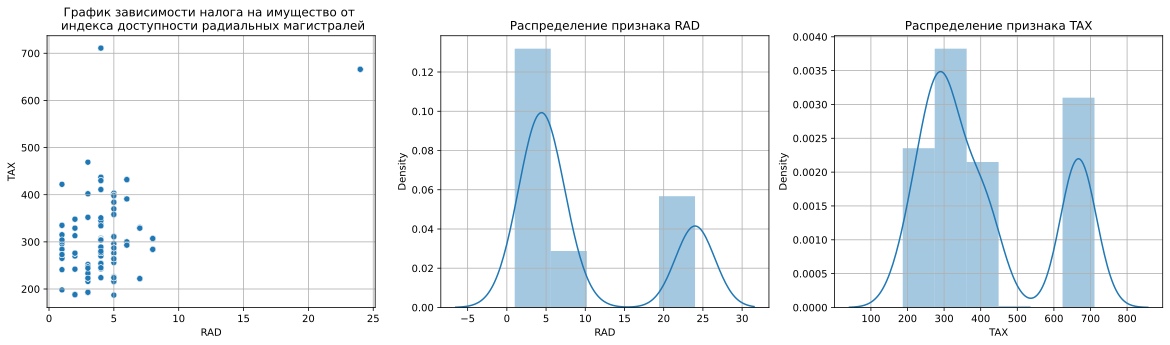

In [14]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data['RAD'], data['TAX']).grid()
plt.title('График зависимости налога на имущество от \n индекса доступности радиальных магистралей')

plt.subplot(1, 3, 2)
sns.distplot(a=data['RAD']).grid()
plt.title('Распределение признака RAD')

plt.subplot(1, 3, 3)
sns.distplot(a=data['TAX']).grid()
plt.title('Распределение признака TAX')

plt.show()

**На графике Box plot наблюдаем, что выбросов в признаках RAD и TAX нет.**

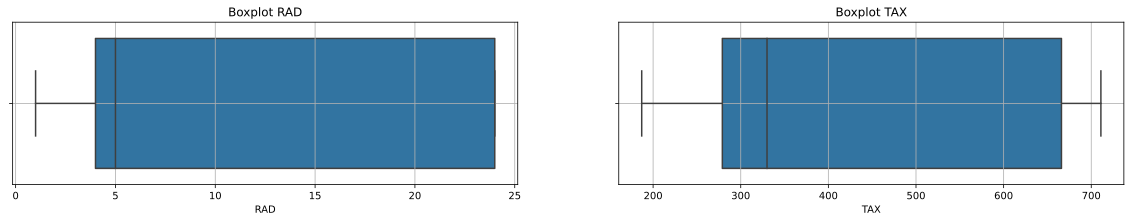

In [15]:
plt.figure(figsize = (20, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data['RAD']).grid()
plt.title('Boxplot RAD')

plt.subplot(1, 2, 2)
sns.boxplot(data['TAX']).grid()
plt.title('Boxplot TAX')
plt.show()

**Посмотрим на распределения признаков, зависимости и boxplot-ы оставшихся пар с большой корреляцией.**
**Начнем с анализа взаимосвязи ('LSTAT', 'MEDV', 'RM'). На целевую переменную MEDV оказывают сильное влияние процент низкого статуса населения и среднее количество комнат в доме. Доказательством этому служат графики зависимости от целевой переменной признаков. Коэффициент Пирсона и графики зависимости "намекают" о линейной зависимости между данными признаками (особенно стоит обратить внимание на связь MEDV и RM).**

**Распределения целевой переменной и признака количетсв комнат имеют Гауссовское распределение.**

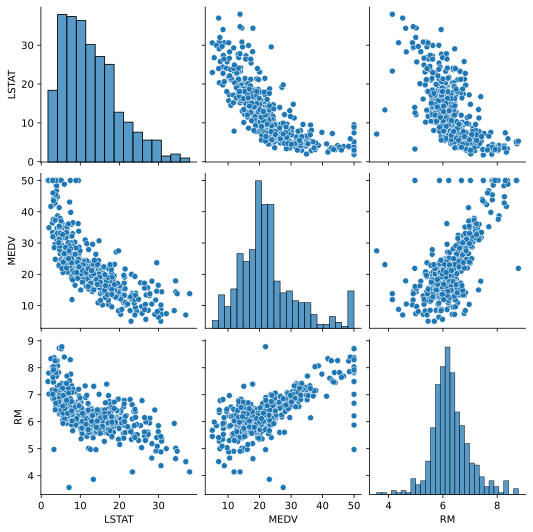

In [16]:
n_columns = ['LSTAT', 'MEDV', 'RM']
sns.pairplot(data[n_columns])

**Наблюдается небольшое количество выбросов в целевой переменной и в признаке процентной состовляющей населения низкого статуса, а также в признаке среднего количества комнат в доме.**

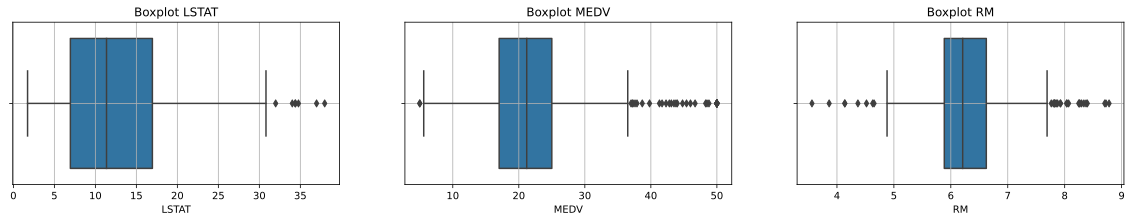

In [17]:
plt.figure(figsize = (20, 3))
for i, j in zip(n_columns, list(range(1, len(n_columns) + 1))):
    plt.subplot(1, len(n_columns), j)
    sns.boxplot(data[i]).grid()
    plt.title('Boxplot ' + i)
plt.show()

**По проделанному корреляционнуму анализу был выделен признак INDUS - доля акров, которые не относятся к розничной торговле в городе. Данный признак хорошо коррелировал с тремя признаками - NOX (концентрация оксида озота), DIS (расстояния до пяти Бостоновских центров) и TAX (полная ставка налога).**

**Если обратить внимание на график зависимости признака INDUS с остальными тремя выше описанными, то здесь нельзя выделить сильную линейную зависимость как в корреляционном анализе (коэффициент Пирсона больше 0.7 в парах INDUS с остальными тремя признаками). Можно выделить связь - (DIS, NOX). Коэффициент корреляции - 0,77 и график зависимости подтверждают обратную линейную связь.**

**Распределения признаков не похожи на наромальное.**

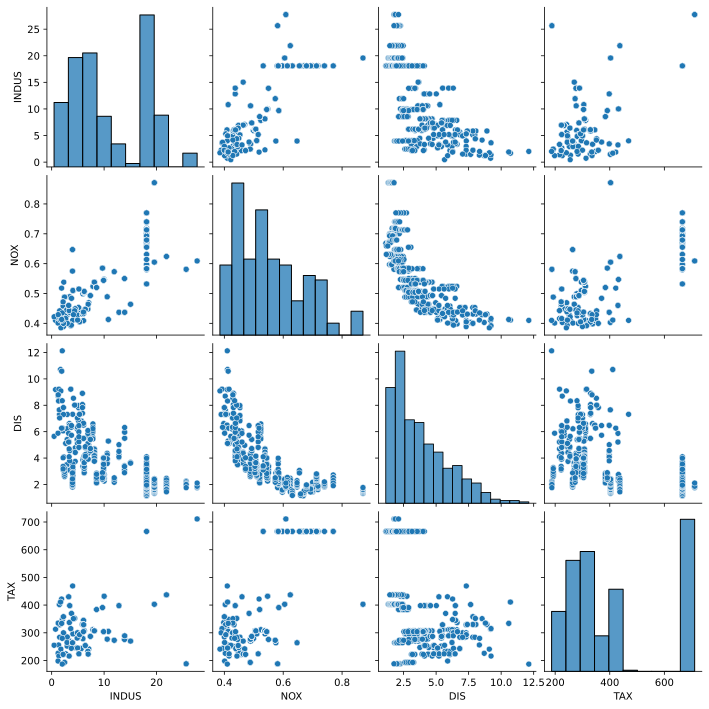

In [18]:
n_columns = ['INDUS', 'NOX', 'DIS', 'TAX']
sns.pairplot(data[n_columns])

**Среди рассматриваемых четырех признаках отсуствуют выбросы, кроме DIS.**

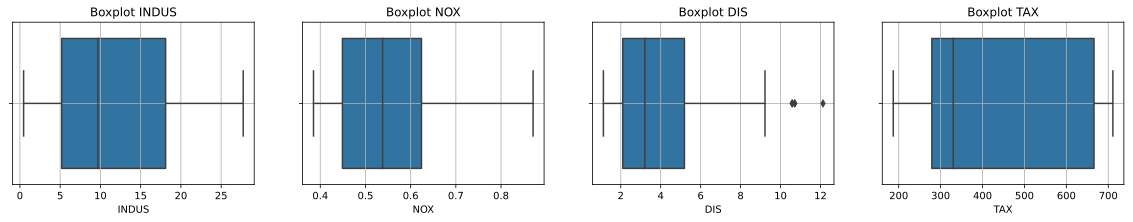

In [19]:
plt.figure(figsize = (20, 3))
for i, j in zip(n_columns, list(range(1, len(n_columns) + 1))):
    plt.subplot(1, len(n_columns), j)
    sns.boxplot(data[i]).grid()
    plt.title('Boxplot ' + i)
plt.show()

**Теперь рассмотрим пары признаков - AGE, NOX и DIS. В корреляционном анализе были получены большие коэффициенты Пирсона (по модулю боль 0.7). Графики зависимости показывают, что доля жилых единиц, построенных до 1940 года хорошо обратно коррелирует с признаком расстояния до пяти Бостоновских центров занятости и положительно коррелирует с концентрацией оксида азота в местности.**

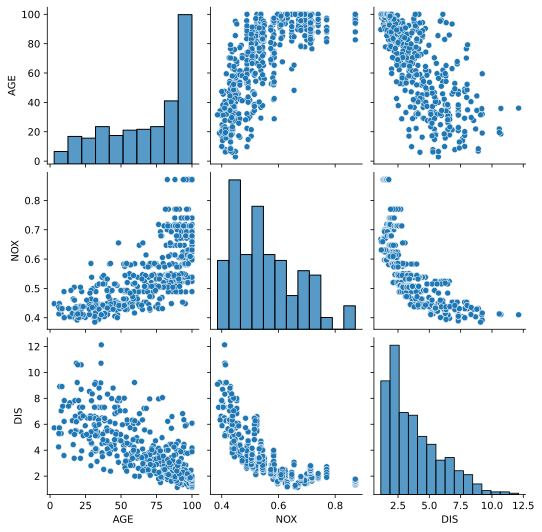

In [20]:
n_columns = ['AGE', 'NOX', 'DIS']
sns.pairplot(data[n_columns])

**По корреляционному анализу определилось, что на целевую переменную очень сильное влияние имеют процент низкого статуса населения и среднее количество комнат в доме. Интересно будет посмотреть на результаты модели, построенной только по этим двум признакам.**

**Присуствуют признаки, которые имеют сильную связь между собой. Возможно некоторые придется не учитывать для облегчения модели.**

**Рассмотрим оставщиеся пять признаков, которые слабее коррелируют остальными признаками и с целевой переменной. По распределению признака границы с рекой можно заявить о том, что большиство домов не граничат с ней. Цена **

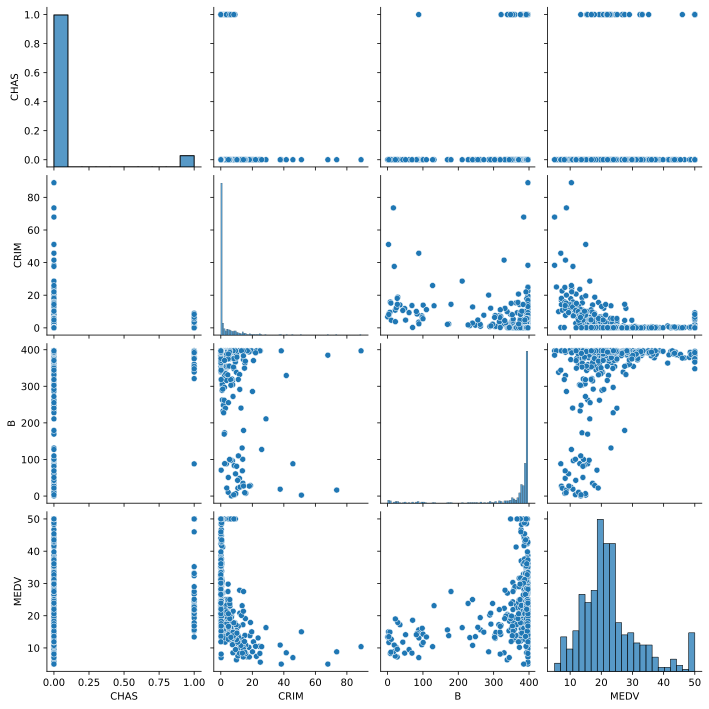

In [21]:
# n_columns = ['ZN', 'CHAS', 'PTRATIO', 'N', 'CRIM']
n_columns = ['CHAS', 'CRIM', 'B', 'MEDV']
sns.pairplot(data[n_columns])

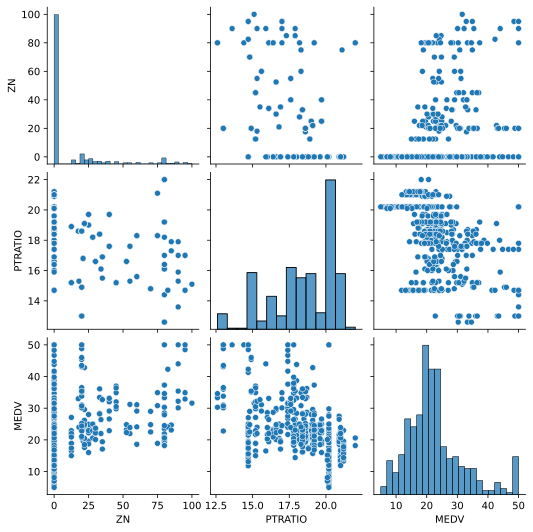

In [22]:
n_columns = ['ZN', 'PTRATIO', 'MEDV']
sns.pairplot(data[n_columns])

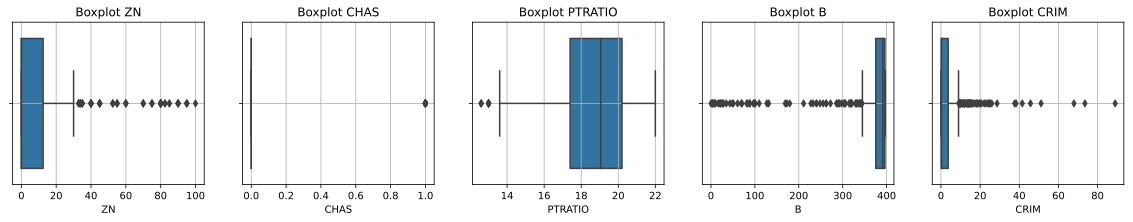

In [23]:
n_columns = ['ZN', 'CHAS', 'PTRATIO', 'B', 'CRIM']
plt.figure(figsize = (20, 3))
for i, j in zip(n_columns, list(range(1, len(n_columns) + 1))):
    plt.subplot(1, len(n_columns), j)
    sns.boxplot(data[i]).grid()
    plt.title('Boxplot ' + i)
plt.show()

## Промежуточные выводы

**По проведенному анализу видно, что можно отбросить признак - доля черных по городу так как он почти постоянен и не вносит существенные изменения в целевую переменную. То же самое можем наблюдать и в признаке границы с рекой CHAS  и доли земли под жилую застройку ZN(они тоже почти постоянны). Больше половины признаков имеют выбросы. Некоторые из них имеют распределения, похожие на логнормальное. К ним можно применить логарифмирование, что поможет с борьбой против выбросов. Есть признаки сильно коррелирующие между собой, это может внести дополнительные сложности в модель. В случае плохого показателя теста, нужно будет это использовать.**

## Предобработка данных

**Подготовим данные для построения моделей машинного обучения для "предсказания" цены на жилье в Бостоне в 1970-ых годах. Думаю, здесь хорошо должна сработать модель линейной регрессии, так как связи "достаточно линейные". Поэтому необходимо стандартизировать данные и решить вопрос с выбросами. Помимо линейной регрессии попробуем применить остальные модели.**

### Обработка выбросов

Можно применить два варианта:

1 - Удалить все выбросы, лежащие вне (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

2 - Если распределение признака близко к логнормальному, то можно применить логарифмирование признака, распределение которого должно быть нормальным и без выбросов.

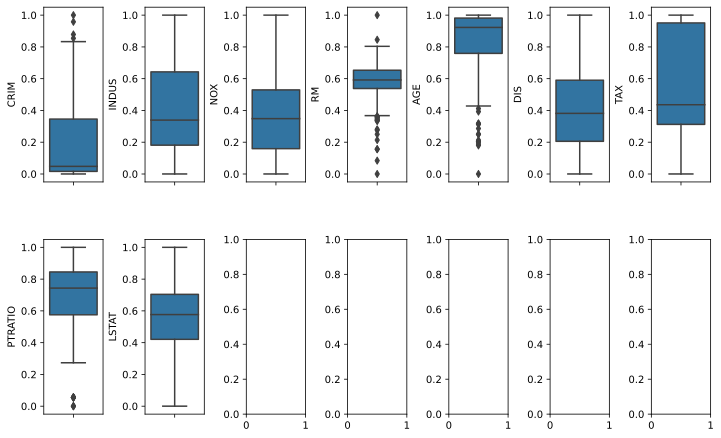

In [151]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(10, 6))
i = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[i])
    i += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Распределение таких признаков, как процент низкого статуса населения, взвешенные расстояния до пяти бостоновских центров занятости, уровень преступности на душу населения и концетнтрация оксида азота похожи на логнормальное распределение. Соотвественно, логарифм от значения данных признаков должен быть похожим на нормальное распределение и значительно сократить количество выбросов.. 

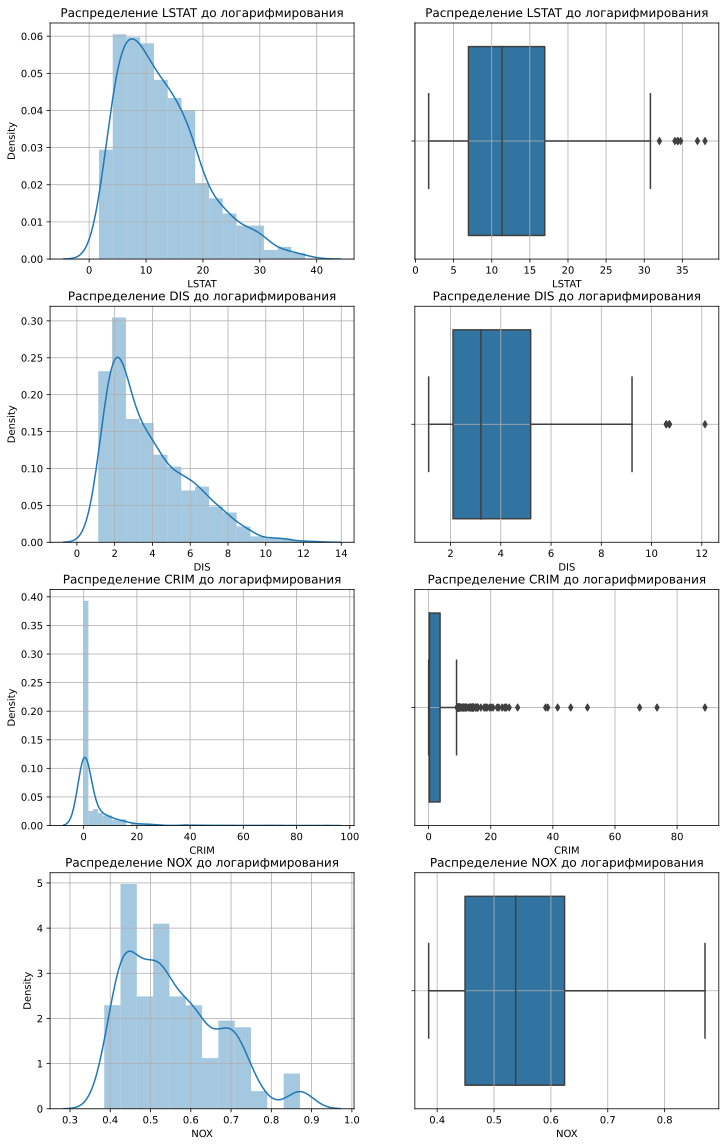

In [78]:
plt.figure(figsize = (12, 20))
columns_log = ['LSTAT', 'DIS', 'CRIM', 'NOX']
k = 0
for i in range(len(columns_log)):
    k += 1
    plt.subplot(len(columns_log), 2, k)
    sns.distplot(data[columns_log[i]]).grid()
    plt.title('Распределение ' + columns_log[i] + ' до логарифмирования')
    k += 1
    plt.subplot(len(columns_log), 2, k)
    sns.boxplot(data[columns_log[i]]).grid()
    plt.title('Распределение ' + columns_log[i] + ' до логарифмирования')

Добавим новые признаки (логарифм от них) и посмтрим как они распределяются и на количество выбросов.

**Распределение новых признаков близко к нормальному. Практически отсуствуют выбросы. В остальных рассмтариваемых признаках выбросов не так много, можно попробовать построить модель и с ними.**

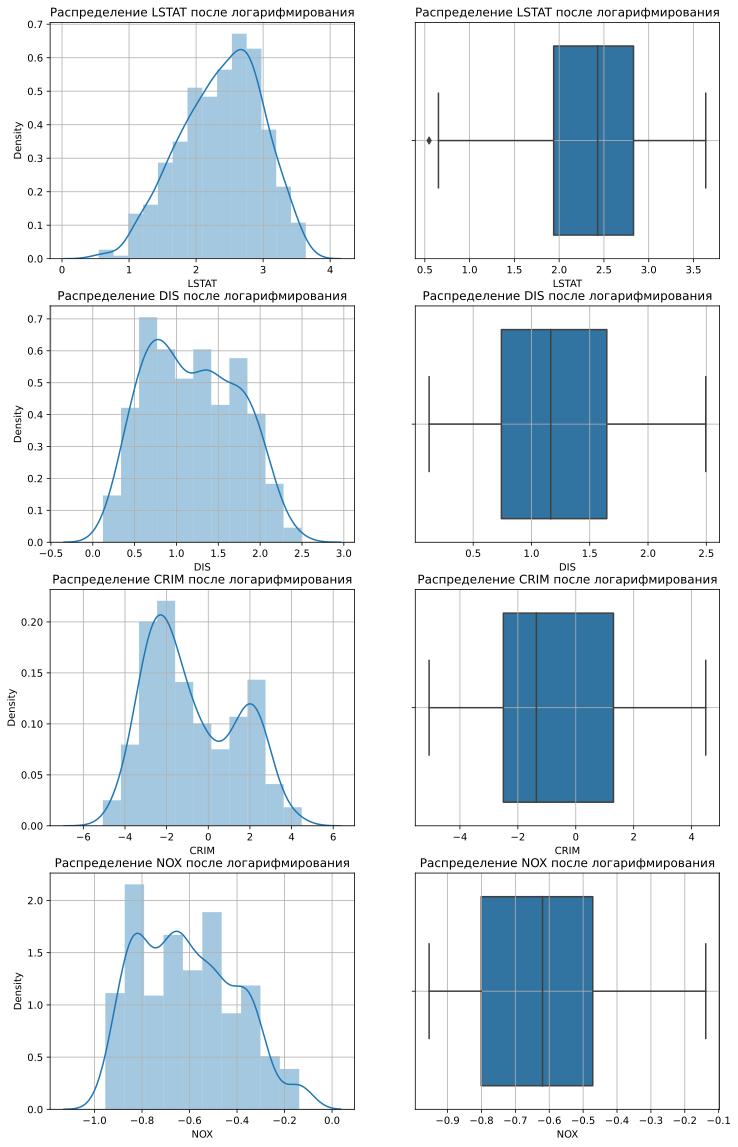

In [79]:
plt.figure(figsize = (12, 20))
columns_log = ['LSTAT', 'DIS', 'CRIM', 'NOX']
k = 0
for i in range(len(columns_log)):
    k += 1
    plt.subplot(len(columns_log), 2, k)
    sns.distplot(np.log(data[columns_log[i]])).grid()
    plt.title('Распределение ' + columns_log[i] + ' после логарифмирования')
    k += 1
    plt.subplot(len(columns_log), 2, k)
    sns.boxplot(np.log(data[columns_log[i]])).grid()
    plt.title('Распределение ' + columns_log[i] + ' после логарифмирования')

**Добавим новые признаки**

In [114]:
columns_log = ['LSTAT', 'DIS', 'CRIM', 'NOX']
for i in columns_log:
    data[i + '_LOG'] = np.log(data[i])

In [105]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  LSTAT_LOG   DIS_LOG  CRIM_LOG   NOX_LOG  
0       15.3  396.90   4.98  24.0   1.605430  1.408545 -5.064036 -0.619897  
1       17.8  396.90   9.14  21.6   2.212660  1.602836 -3.600502 -0.757153  
2       17.8  392.83   4.03  34.7   1.393766  1.602836 -3.601235 -0.757153  
3       18.7  394.63   2.94  33.4   1.078410  1.802073 -3.430523 -0.780886  
4       18.7  396.90   5.33  36.2   1.673351  1.802073 -2.672924 -0.780886  
..       ...     ...    ...   ...        ...       ...       ...       ...  
501     21.0  391.99   9.67  22.4   2.269028  0.907694 -2.770511 -0.556870  
502     21.0  396.90   9.08  20.6   2.206074  0.827460 -3.095111 -0.556870  
503     21.0  396.90   5.64  23.9   1.729884  0.773574 -2.800824 -0.556870  
504     21.0  393.45   6.48  22.0   1.868721  0.870833 -2.211009 -0.556870  
505     21.0  396.90   7.88  11.9   2.064328  0.918289 -3.048922 -0.556870  

[466 rows x 18 columns]

### Удаление признаков

Удалить

In [146]:
for col in data.columns:
    if np.abs(data[col].skew()) > 0.3:
        data[col] = np.log1p(data[col])
d_label = data['MEDV']
data = data.drop(['B', 'CHAS', 'ZN', 'RAD', 'MEDV'], axis = 1)

**Удалим признаки B, CHAS, ZN и RAS (выше было доказано, что они мало информативны). Удалим LSTAT, DIS, CRIM и NOX (будем использовать их логарифм)**

In [115]:
d_label = data['MEDV']
data = data.drop(['B', 'CHAS', 'ZN', 'RAD', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'MEDV'], axis = 1)

**Нормализуем признаки по технологии MinMax Scaling**

In [147]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = list(data.columns))
data

CRIM     INDUS       NOX        RM       AGE       DIS       TAX  \
0    0.000000  0.058148  0.348378  0.665067  0.870184  0.478107  0.343405   
1    0.004594  0.234444  0.195768  0.638140  0.927986  0.565690  0.192710   
2    0.004590  0.234444  0.195768  0.766601  0.850537  0.565690  0.192710   
3    0.005688  0.053333  0.170778  0.736302  0.763613  0.658514  0.128211   
4    0.013458  0.053333  0.170778  0.760500  0.814342  0.658514  0.128211   
..        ...       ...       ...       ...       ...       ...       ...   
461  0.012117  0.414444  0.423191  0.668178  0.887775  0.268411  0.282875   
462  0.008452  0.414444  0.423191  0.583858  0.919406  0.237284  0.282875   
463  0.011725  0.414444  0.423191  0.732691  0.971319  0.216799  0.282875   
464  0.021742  0.414444  0.423191  0.702431  0.965588  0.254019  0.282875   
465  0.008907  0.414444  0.423191  0.567182  0.935208  0.272576  0.282875   

      PTRATIO     LSTAT  
0    0.344665  0.270919  
1    0.616239  0.476323  
2    0.616239  0.203626  
3    0.705237  0.108624  
4    0.705237  0.293044  
..        ...       ...  
461  0.915398  0.496141  
462  0.915398  0.474015  
463  0.915398  0.311641  
464  0.915398  0.357976  
465  0.915398  0.424712  

[466 rows x 9 columns]

## Построение моделей машинного обучения

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [149]:
X_train, X_test, y_train, y_test = train_test_split(data, d_label, test_size=0.2, random_state=42)

In [150]:
reg = LinearRegression()
# scr = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scr = cross_val_score(reg, data, d_label, cv=5, scoring='neg_mean_squared_error')
scr.mean()

-14.274328788816197

CRIM
ZN
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
